## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [206]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

Specify explicitly the header parameter set to zero to add Column names.

In [207]:
df = pd.read_csv('QueryResults.csv', header=0, names=['DATE', 'TAG', 'POSTS'])

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [208]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,506
4,2008-08-01 00:00:00,c++,164


In [209]:
df.tail()

,DATE,TAG,POSTS
2309,2022-06-01 00:00:00,php,4424
2310,2022-06-01 00:00:00,python,24136
2311,2022-06-01 00:00:00,r,4646
2312,2022-06-01 00:00:00,ruby,503
2313,2022-06-01 00:00:00,swift,1956


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [210]:
df.shape

(2314, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [211]:
df.count()

DATE     2314
TAG      2314
POSTS    2314
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?



> The nunique method will return the number of unique values in the dataframe. The value for POSTS has been ommited since it doesn't really have any meaning.



In [212]:
unique_values = df.nunique()

In [213]:
unique_values[['DATE', 'TAG']]

DATE    168
TAG      14
dtype: int64



> The sum method will return the overall sum of columns by default.  If values are strings, they are concatenated.



In [214]:
total_posts_all_time = df.sum()

In [215]:
total_posts_all_time[['POSTS']]

POSTS    11560007
dtype: object

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2314 entries, 0 to 2313
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DATE    2314 non-null   object
 1   TAG     2314 non-null   object
 2   POSTS   2314 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 54.4+ KB


In [217]:
posts_by_language = df.groupby('TAG').sum().sort_values('POSTS', ascending=False)

In [218]:
posts_by_language

,POSTS
TAG,
javascript,2390284
python,1973123
java,1851332
c#,1544452
php,1438182
c++,768478
r,453929
c,381416
swift,314670




> The language with the most posts since the creation of Stack Overflow will be given by the max funciton.



In [219]:
posts_by_language.max()

POSTS    2390284
dtype: int64

In [220]:
df.groupby('TAG').sum().idxmax()

POSTS    javascript
dtype: object

Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 




> Months of Entries by Language



In [221]:
df.groupby(by='TAG').count().sort_values('POSTS')

,DATE,POSTS
TAG,,
go,152,152
swift,159,159
r,165,165
assembly,167,167
c,167,167
c++,167,167
delphi,167,167
java,167,167
javascript,167,167


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"



> Get a date value by either specifying the key name to access a dictionary object in the traditional sense, or use dot notation for the key and square brackets for the element.



In [222]:
df['DATE'][1]

'2008-08-01 00:00:00'

In [223]:
df.DATE[1]

'2008-08-01 00:00:00'



> Determine the type of the value in the standard Python way.



In [224]:
type(df.DATE[1])

str



> Change the string value to a datetime object using the pandas to_datetime method.  Then check the type is correct.


In [225]:
pd.to_datetime(df.DATE[1])

Timestamp('2008-08-01 00:00:00')

In [226]:
type(pd.to_datetime(df.DATE[1]))

pandas._libs.tslibs.timestamps.Timestamp



> Now, change the type of the entire DATE column.



In [227]:
df.DATE = pd.to_datetime(df.DATE)

In [228]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,506
4,2008-08-01,c++,164


## Data Manipulation



In [229]:
test_df = pd.DataFrame({'Age': ['Young', 'Young', 'Young', 'Young', 'Old', 'Old', 'Old', 'Old'],
                        'Actor': ['Jack', 'Arnold', 'Keanu', 'Sylvester', 'Jack', 'Arnold', 'Keanu', 'Sylvester'],
                        'Power': [100, 80, 25, 50, 99, 75, 5, 30]})

In [230]:
test_df

,Age,Actor,Power
0,Young,Jack,100
1,Young,Arnold,80
2,Young,Keanu,25
3,Young,Sylvester,50
4,Old,Jack,99
5,Old,Arnold,75
6,Old,Keanu,5
7,Old,Sylvester,30


In [231]:
pivoted_df = test_df.pivot(index='Age', columns='Actor')

In [232]:
pivoted_df

Power                     
Actor Arnold Jack Keanu Sylvester
Age                              
Old       75   99     5        30
Young     80  100    25        50

> Pivot the Stack Overflow data so that each row is a date and each column is a programming language.

In [233]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [234]:
reshaped_df.shape

(168, 14)

In [235]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,506.0,164.0,14.0,NaN,222.0,164.0,28.0,159.0,120.0,NaN,70.0,NaN
2008-09-01,28.0,318.0,1647.0,753.0,104.0,NaN,1133.0,637.0,130.0,477.0,537.0,6.0,287.0,NaN
2008-10-01,15.0,303.0,1989.0,809.0,112.0,NaN,1150.0,724.0,127.0,612.0,508.0,NaN,247.0,NaN
2008-11-01,17.0,259.0,1732.0,734.0,141.0,NaN,957.0,581.0,97.0,502.0,452.0,1.0,159.0,NaN


In [236]:
reshaped_df.tail()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2022-02-01,225.0,1789.0,5828.0,3478.0,188.0,688.0,7269.0,15449.0,97.0,3720.0,22620.0,4338.0,456.0,1880.0
2022-03-01,254.0,2102.0,6485.0,3845.0,134.0,830.0,8117.0,16358.0,105.0,3769.0,24577.0,5085.0,528.0,2076.0
2022-04-01,265.0,1878.0,5961.0,3861.0,122.0,757.0,7875.0,16028.0,101.0,3828.0,23649.0,4781.0,494.0,1777.0
2022-05-01,291.0,1928.0,6336.0,3931.0,129.0,681.0,7915.0,16189.0,94.0,4047.0,23287.0,4859.0,502.0,1769.0
2022-06-01,265.0,1774.0,6568.0,3728.0,130.0,825.0,7697.0,16460.0,135.0,4424.0,24136.0,4646.0,503.0,1956.0


In [237]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [238]:
reshaped_df.count()

TAG
assembly      167
c             167
c#            168
c++           167
delphi        167
go            152
java          167
javascript    167
perl          167
php           167
python        167
r             165
ruby          167
swift         159
dtype: int64

In [239]:
reshaped_df.fillna(0, inplace=True)

In [240]:
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,506.0,164.0,14.0,0.0,222.0,164.0,28.0,159.0,120.0,0.0,70.0,0.0
2008-09-01,28.0,318.0,1647.0,753.0,104.0,0.0,1133.0,637.0,130.0,477.0,537.0,6.0,287.0,0.0
2008-10-01,15.0,303.0,1989.0,809.0,112.0,0.0,1150.0,724.0,127.0,612.0,508.0,0.0,247.0,0.0
2008-11-01,17.0,259.0,1732.0,734.0,141.0,0.0,957.0,581.0,97.0,502.0,452.0,1.0,159.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-01,225.0,1789.0,5828.0,3478.0,188.0,688.0,7269.0,15449.0,97.0,3720.0,22620.0,4338.0,456.0,1880.0
2022-03-01,254.0,2102.0,6485.0,3845.0,134.0,830.0,8117.0,16358.0,105.0,3769.0,24577.0,5085.0,528.0,2076.0
2022-04-01,265.0,1878.0,5961.0,3861.0,122.0,757.0,7875.0,16028.0,101.0,3828.0,23649.0,4781.0,494.0,1777.0


In [241]:
reshaped_df.isna().values.any()

False

> It is useful to note that the index values for the pivot table (e.g. the DATE values) and the column headings (e.g. the programming languages) are now accessible as properties of the data frame via dot notation.

In [253]:
reshaped_df.index

DatetimeIndex(['2008-07-01', '2008-08-01', '2008-09-01', '2008-10-01',
               '2008-11-01', '2008-12-01', '2009-01-01', '2009-02-01',
               '2009-03-01', '2009-04-01',
               ...
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01',
               '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01',
               '2022-05-01', '2022-06-01'],
              dtype='datetime64[ns]', name='DATE', length=168, freq=None)

In [254]:
reshaped_df.swift

DATE
2008-07-01       0.0
2008-08-01       0.0
2008-09-01       0.0
2008-10-01       0.0
2008-11-01       0.0
               ...  
2022-02-01    1880.0
2022-03-01    2076.0
2022-04-01    1777.0
2022-05-01    1769.0
2022-06-01    1956.0
Name: swift, Length: 168, dtype: float64

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

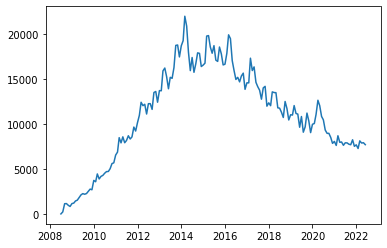

In [252]:
plt.plot(reshaped_df.index, reshaped_df.java)

> Change the size of the chart with the figure method and the figsize property value.

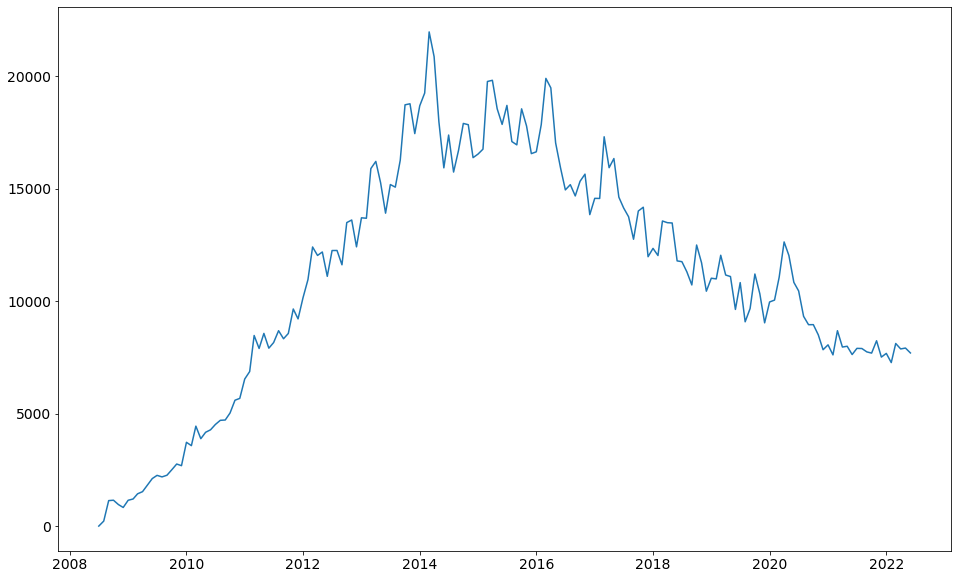

In [256]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(reshaped_df.index, reshaped_df.java)

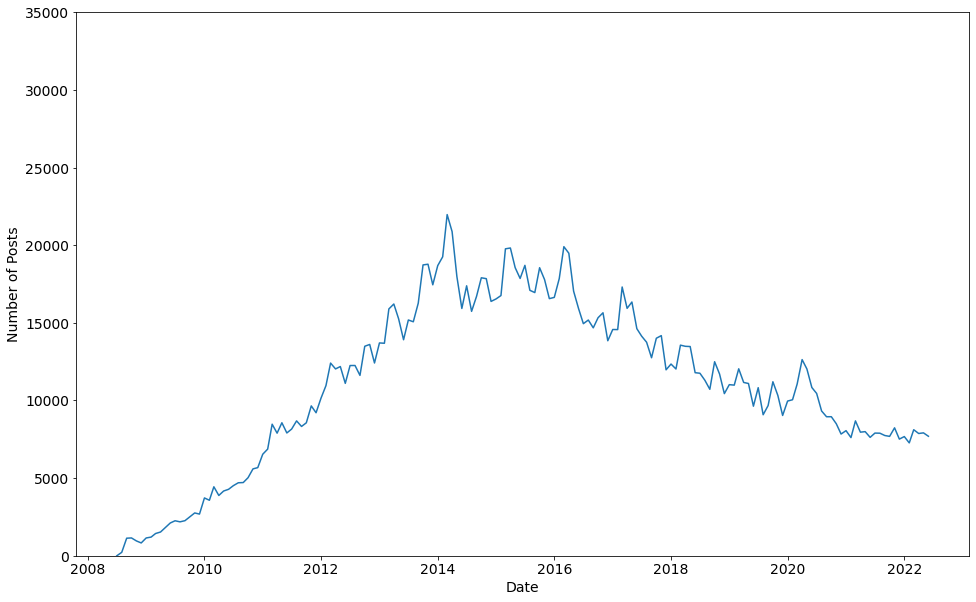

In [260]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0,35000)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.plot(reshaped_df.index, reshaped_df.java)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

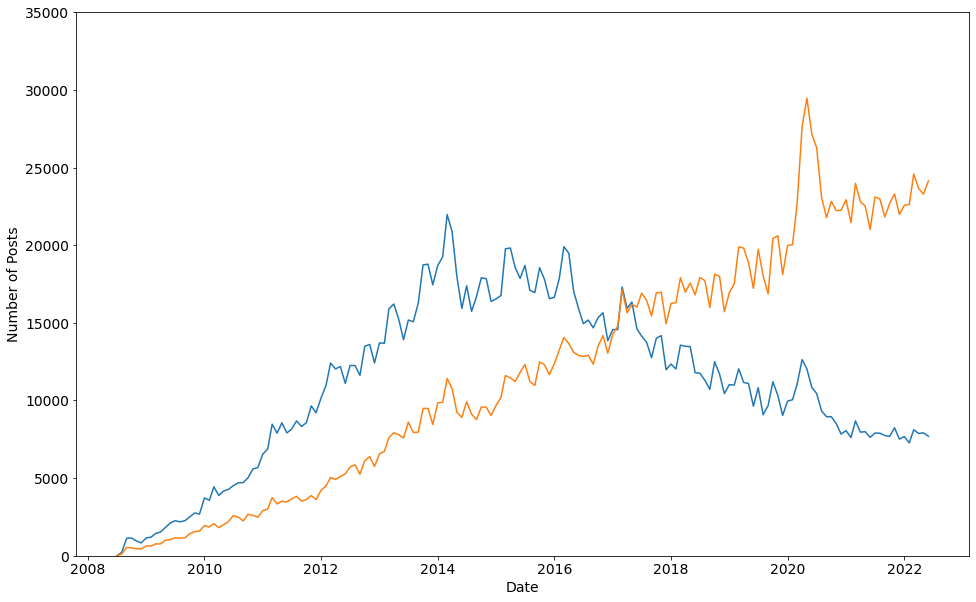

In [262]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0,35000)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.plot(reshaped_df.index, reshaped_df.java, reshaped_df.python)

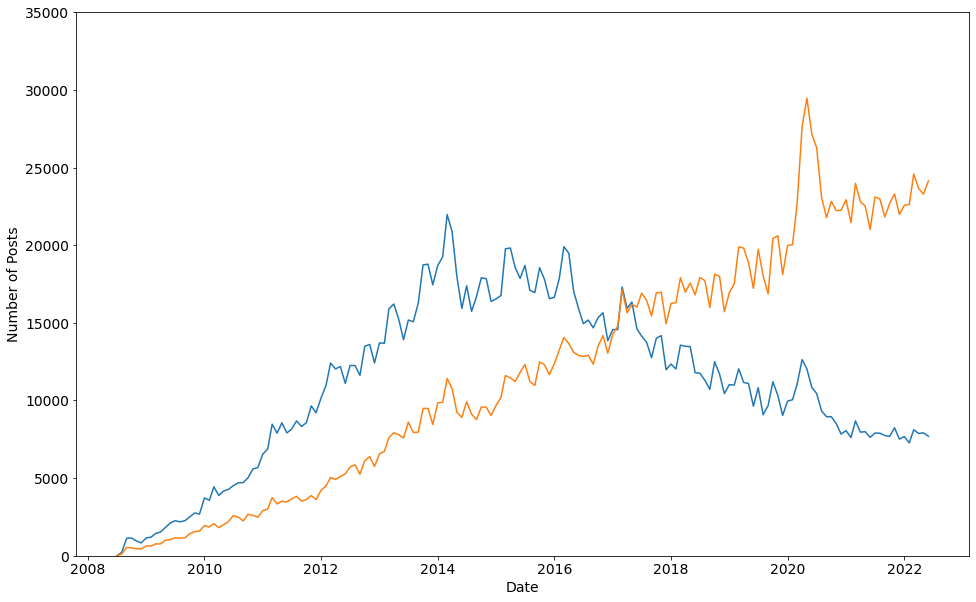

In [263]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0,35000)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.plot(reshaped_df.index, reshaped_df.java)
plt.plot(reshaped_df.index, reshaped_df.python)

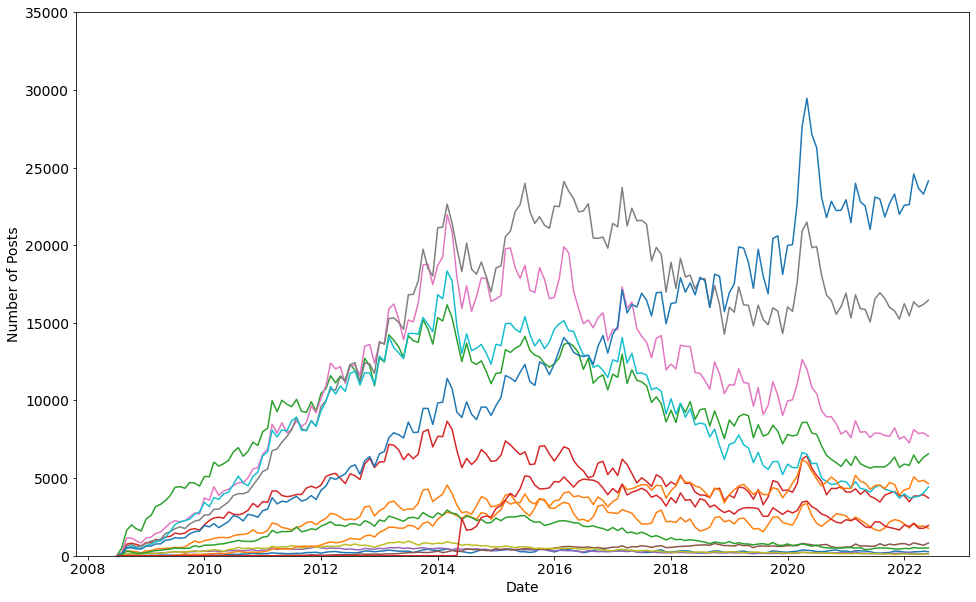

In [264]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0,35000)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)

for column in reshaped_df.columns:
  plt.plot(reshaped_df.index, reshaped_df[column])

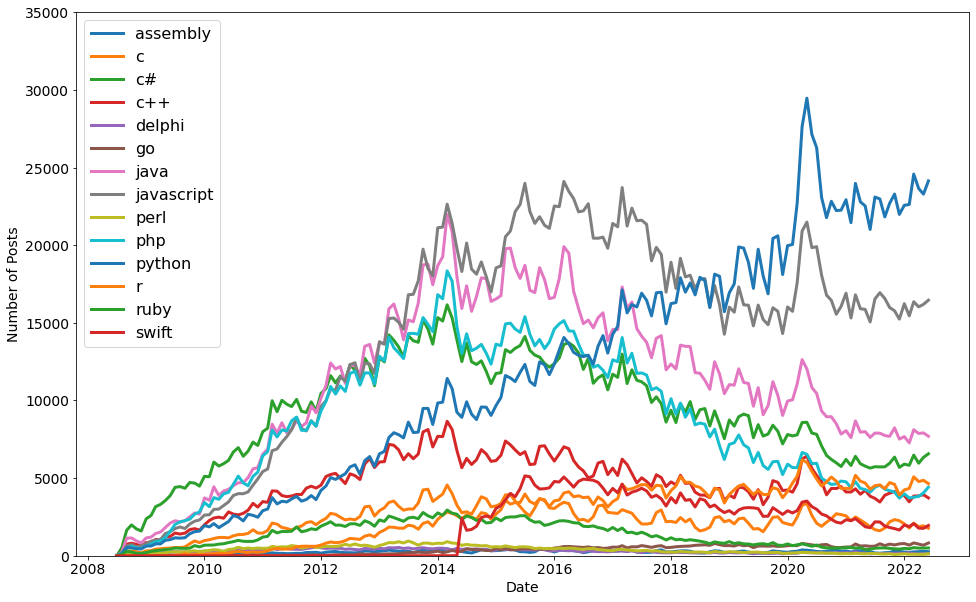

In [266]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0,35000)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)

for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column],
             linewidth=3, label=reshaped_df[column].name)
    
plt.legend(fontsize=16)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

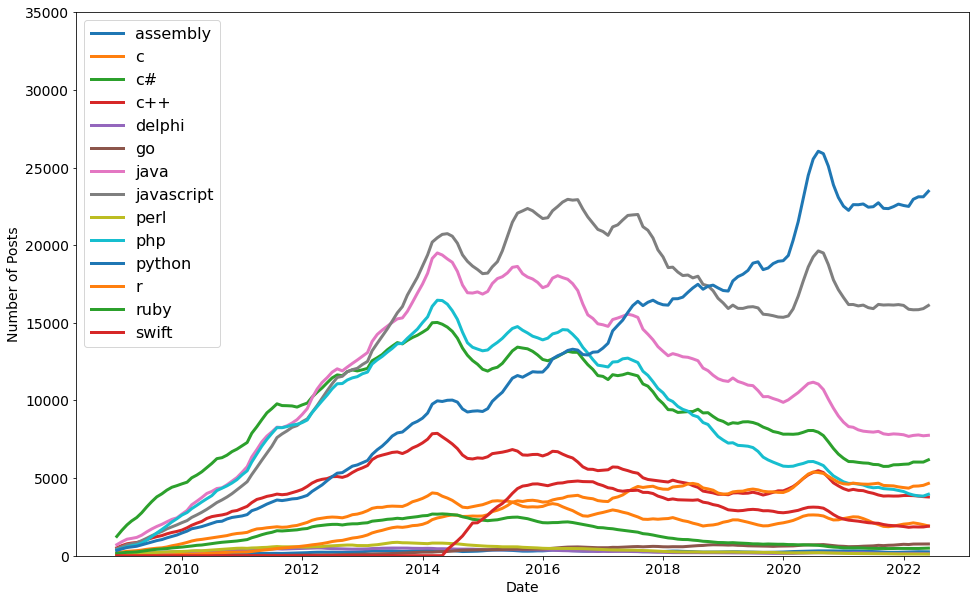

In [268]:
# The window is number of observations that are averaged
rolling_df = reshaped_df.rolling(window=6).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0,35000)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)

for column in rolling_df.columns:
    plt.plot(rolling_df.index, rolling_df[column],
             linewidth=3, label=rolling_df[column].name)
    
plt.legend(fontsize=16)

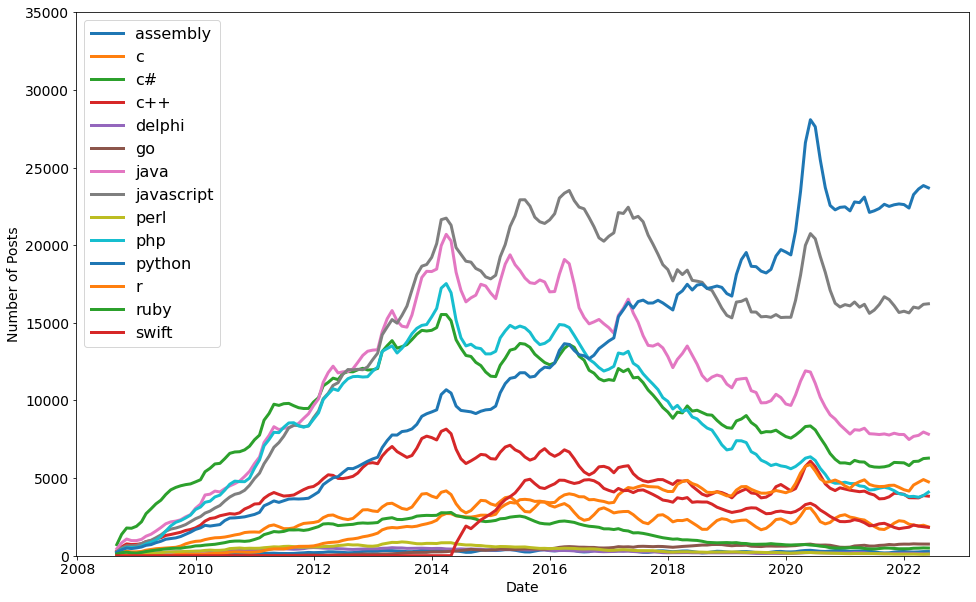

In [269]:
# The window is number of observations that are averaged
rolling_df = reshaped_df.rolling(window=3).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0,35000)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)

for column in rolling_df.columns:
    plt.plot(rolling_df.index, rolling_df[column],
             linewidth=3, label=rolling_df[column].name)
    
plt.legend(fontsize=16)

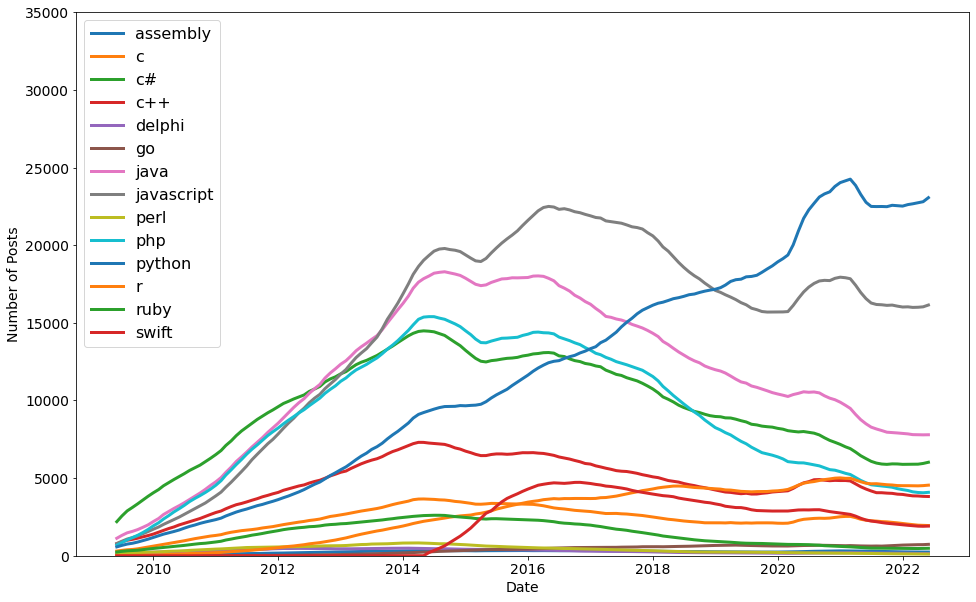

In [270]:
# The window is number of observations that are averaged
rolling_df = reshaped_df.rolling(window=12).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0,35000)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)

for column in rolling_df.columns:
    plt.plot(rolling_df.index, rolling_df[column],
             linewidth=3, label=rolling_df[column].name)
    
plt.legend(fontsize=16)